Moisture Value: 16
Air Temperature Value: 70
Humidity Value: 20
Temperature Adjustment: 65.67


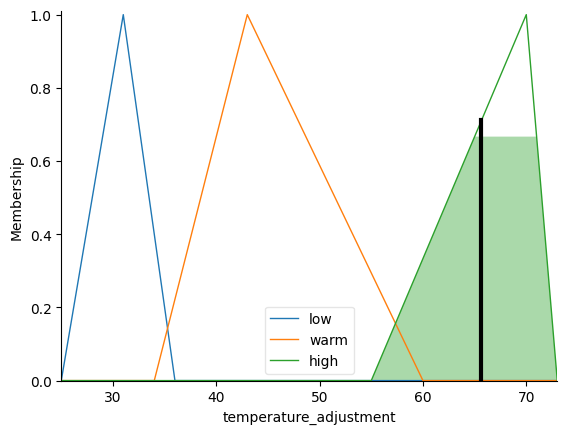

In [28]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

"""
Set sensor input values will cause an error when moisture content is <13 since there is no rule for that
One thing I think of doing is terminating the process once the moisture values become <13.5%
Play with the values, when moisture value is above 18% fuzzy logic will suggest to increase the temperature
and as it decays it will suggest to lower temperatures
"""
temperature_value = 70
humidity_value = 20

# Universal Set for Temperature and Moisture
temperature = ctrl.Antecedent(np.arange(25, 74, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0,91,1), 'humidity')

# Universal Set for Output; value of temperature adjustment
temperature_adjustment = ctrl.Consequent(np.arange(25, 74, 1), 'temperature_adjustment')

"""
Universal Set, for choosing values that fuzzy logic can pick to adjust temperature accordingly
#for low it will choose a value between 0 and 60 degrees celsius
#for high it will choose a value between 40 and 100 degrees celsius
# low = 0-41 degree celsius High = 40-100 degrees celsius""
output_variable['low'] = fuzz.trimf(output_variable.universe, [0, 20, 60])
output_variable['high'] = fuzz.trimf(output_variable.universe, [40, 80, 100])
"""

# Membership Functions 
temperature['low'] = fuzz.trimf(temperature.universe, [25, 31, 36])
temperature['warm'] = fuzz.trimf(temperature.universe, [34,43,60])
temperature['high'] = fuzz.trimf(temperature.universe, [55,70,73])

humidity['low'] = fuzz.trimf(humidity.universe, [0,30,40])
humidity['average'] = fuzz.trimf(humidity.universe, [30,50,60])
humidity['high'] = fuzz.trimf(humidity.universe, [55,60,90])

temperature_adjustment['low'] = fuzz.trimf(temperature_adjustment.universe, [25, 31, 36])
temperature_adjustment['warm'] = fuzz.trimf(temperature_adjustment.universe, [34,43,60])
temperature_adjustment['high'] = fuzz.trimf(temperature_adjustment.universe, [55,70,73])


#by default temperature is low if humiidity is high
rule1_t = ctrl.Rule((temperature['high']|temperature['warm']|temperature['low']) &  
                     humidity['high'], 
                    temperature_adjustment['low'])

rule2_t = ctrl.Rule(temperature['high'] & humidity['low'], temperature_adjustment['high'])

rule3_t = ctrl.Rule(temperature['high'] & humidity['average'], temperature_adjustment['warm'])

rule4_t = ctrl.Rule(temperature['warm'] & humidity['low'], temperature_adjustment['high'])

rule5_t = ctrl.Rule(temperature['warm'] & humidity['average'], temperature_adjustment['warm'])

rule6_t = ctrl.Rule(temperature['low'] & humidity['low'],temperature_adjustment['high'])

rule7_t = ctrl.Rule(temperature['low'] & humidity['average'],temperature_adjustment['warm'])


temperature_ctrl = ctrl.ControlSystem([rule1_t, rule2_t, rule3_t, rule4_t, rule5_t,rule6_t,rule7_t])



# Deffuzification
temperature_sim = ctrl.ControlSystemSimulation(temperature_ctrl)


# Perform the simulation
temperature_sim.input['temperature'] = temperature_value
temperature_sim.input['moisture'] = moisture_value
temperature_sim.input['humidity'] = humidity_value
temperature_sim.compute()



# Display the adjustment value
print(f"Moisture Value: {moisture_value}")
print(f"Air Temperature Value: {temperature_value}")
print(f"Humidity Value: {humidity_value}")
print(f"Temperature Adjustment: {temperature_sim.output['temperature_adjustment']:.2f}")

# Display the plots
#temperature.view(sim=temperature_sim)
#moisture.view(sim=temperature_sim)
#humidity.view(sim=temperature_sim)
temperature_adjustment.view(sim=temperature_sim)
# Show the plots
plt.show()

